# Example notebook

This notebooks shows how you can create multiple features that build/depend upon each other, using spark.

In [1]:
# Cell 1 - import the things you need
import logging
import sys
import importlib

import pyspark.sql as ps
import pandas as pd

from hamilton import driver

logging.basicConfig(stream=sys.stdout)

In [2]:
# Cell 2 - import modules to create part of the DAG from
# We use the autoreload extension that comes with ipython to automatically reload modules when
# the code in them changes.

# import the jupyter extension
%load_ext autoreload
# set it to only reload the modules imported
%autoreload 1


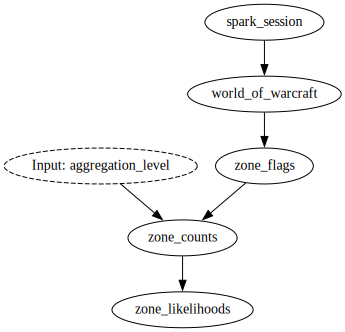

In [3]:
# Cell 3 - Define the inputs, modules containing feature logic and the driver
aggregation_level = "avatarId"
zone_features = importlib.import_module("zone_features__spark_v1")

dr = driver.Driver({}, zone_features)  # can pass in multiple modules
dr.display_all_functions(None)


In [4]:
# Cell 4 - Execute the pipeline and display the result

result = dr.execute(["zone_likelihoods"], inputs={"aggregation_level": aggregation_level})

result.iloc[0,0].toPandas()


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/09/04 21:05:29 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/09/04 21:05:29 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


,avatarId,total_count,darkshore_count,durotar_count,durotar_likelihood,darkshore_likelihood
0,29,5597,3,101,0.018045,0.000536
1,1806,477,0,4,0.008386,0.000000
2,9233,1611,0,10,0.006207,0.000000
3,2040,748,0,16,0.021390,0.000000
4,26,2103,0,40,0.019020,0.000000
...,...,...,...,...,...,...
91059,90894,1,0,0,0.000000,0.000000
91060,90865,1,0,1,1.000000,0.000000
91061,90700,3,0,0,0.000000,0.000000
91062,90655,2,0,0,0.000000,0.000000


23/09/04 22:09:47 WARN HeartbeatReceiver: Removing executor driver with no recent heartbeats: 291015 ms exceeds timeout 120000 ms
23/09/04 22:09:47 WARN SparkContext: Killing executors is not supported by current scheduler.
